# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


#Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy




# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
len(lats)

2000

In [14]:
lat_lngs = zip(lats, lngs)

In [15]:


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['mugur-aksy', 'grindavik', 'hermanus', 'puerto ayora', 'ambon', 'norman wells', 'barrow', 'george town', 'tabarqah', 'waddan', 'sao joao da barra', 'knysna', 'mataura', 'port hardy', 'ambulu', 'tsabong', 'westport', 'chalmette', 'palabuhanratu', 'maragogi', 'hobart', 'new norfolk', 'saint-philippe', 'souillac', 'kavieng', 'albany', 'esperance', 'jadu', 'venado tuerto', 'hambantota', 'avarua', 'rikitea', 'kitimat', 'road town', 'hobyo', 'san patricio', 'mecca', 'qaanaaq', 'punta arenas', 'siuna', 'khatanga', 'sychevka', 'litovko', 'busselton', 'sitka', 'the valley', 'katsuura', 'torbay', 'vao', 'taolanaro', 'talnakh', 'bluff', 'cape town', 'tasiilaq', 'yangjiang', 'vaini', 'upernavik', 'guane', 'lavrentiya', 'hithadhoo', 'narsaq', 'alugan', 'moose factory', 'rialma', 'goderich', 'ushuaia', 'port elizabeth', 'bardiyah', 'alice springs', 'atuona', 'kapaa', 'butaritari', 'port lincoln', 'santa isabel', 'cidreira', 'belushya guba', 'garoua', 'acarau', 'saskylakh', 'wajima', 'husavik', 'gua

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# create lists to put coming responses 
humi = []
temp = []
wind = []
cloud = []
country = []
lat = []
long = []
date = []



# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        humi.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        
    except KeyError:
            print("No city in Open Weather")
            continue

No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open Weather
No city in Open 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_weather = {'City': cities, 'Cloudiness':cloud, 'Country':country, 'Date':date, 'Humidity':humi, 'Lat':lat,'Lng':long,'Temperature':temp,'Wind':wind}
city_weather_frame = pd.DataFrame({ key:pd.Series(value) for key, value in city_weather.items() })
city_weather_frame


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind
0,mugur-aksy,95.0,RU,1.573871e+09,95.0,50.38,90.44,-25.42,6.06
1,grindavik,75.0,IS,1.573871e+09,86.0,63.84,-22.43,32.86,1.12
2,hermanus,100.0,ZA,1.573871e+09,94.0,-34.42,19.24,64.67,28.32
3,puerto ayora,9.0,EC,1.573871e+09,87.0,-0.74,-90.35,71.01,4.00
4,ambon,100.0,FR,1.573871e+09,93.0,47.55,-2.56,44.46,10.29
5,norman wells,90.0,CA,1.573871e+09,76.0,65.28,-126.83,-4.00,17.22
6,barrow,67.0,AR,1.573871e+09,43.0,-38.31,-60.23,68.97,8.63
7,george town,75.0,MY,1.573871e+09,83.0,5.42,100.33,81.36,3.36
8,tabarqah,47.0,LY,1.573871e+09,27.0,29.16,16.14,60.94,9.10
9,waddan,100.0,BR,1.573871e+09,85.0,-21.64,-41.05,71.55,11.59


In [28]:
city_weather_frame_cleaned = city_weather_frame.dropna(how='any')
len(city_weather_frame_cleaned)


672

In [29]:
city_weather_frame_cleaned.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind
0,mugur-aksy,95.0,RU,1.573871e+09,95.0,50.38,90.44,-25.42,6.06
1,grindavik,75.0,IS,1.573871e+09,86.0,63.84,-22.43,32.86,1.12
2,hermanus,100.0,ZA,1.573871e+09,94.0,-34.42,19.24,64.67,28.32
3,puerto ayora,9.0,EC,1.573871e+09,87.0,-0.74,-90.35,71.01,4.00
4,ambon,100.0,FR,1.573871e+09,93.0,47.55,-2.56,44.46,10.29
5,norman wells,90.0,CA,1.573871e+09,76.0,65.28,-126.83,-4.00,17.22
6,barrow,67.0,AR,1.573871e+09,43.0,-38.31,-60.23,68.97,8.63
7,george town,75.0,MY,1.573871e+09,83.0,5.42,100.33,81.36,3.36
8,tabarqah,47.0,LY,1.573871e+09,27.0,29.16,16.14,60.94,9.10
9,waddan,100.0,BR,1.573871e+09,85.0,-21.64,-41.05,71.55,11.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

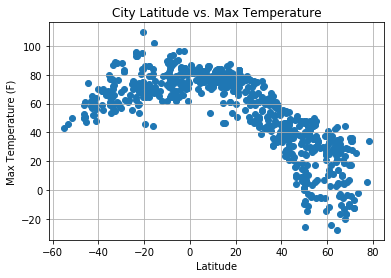

In [36]:
plt.scatter(city_weather_frame_cleaned['Lat'],city_weather_frame_cleaned['Temperature'])

plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.savefig('latitude_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

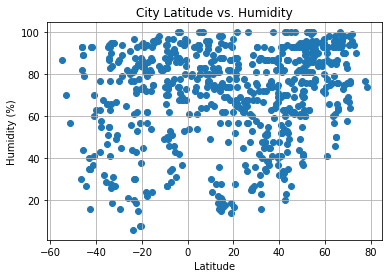

In [37]:
plt.scatter(city_weather_frame_cleaned['Lat'],city_weather_frame_cleaned['Humidity'])

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig('latitude_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

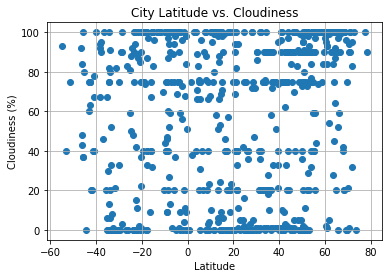

In [40]:
plt.scatter(city_weather_frame_cleaned['Lat'],city_weather_frame_cleaned['Cloudiness'])

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig('latitude_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

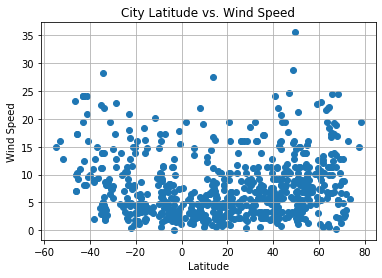

In [41]:
plt.scatter(city_weather_frame_cleaned['Lat'],city_weather_frame_cleaned['Wind'])

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

plt.savefig('latitude_wind.png')
plt.show()